In [2]:
#Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
#rom sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [4]:
titanic = pd.read_csv(url)

In [5]:
titanic.columns = ['PassengerId', 'survived', 'Pclass', 'Name',
                   'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
                   'Cabin', 'Embarked']

In [6]:
titanic.head()

,PassengerId,survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


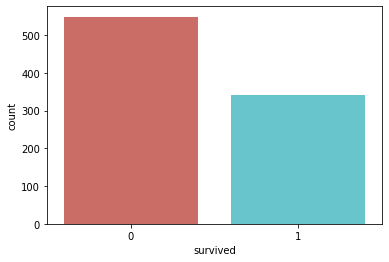

In [7]:
sb.countplot(x='survived', data=titanic,palette='hls')

In [8]:
titanic.isnull().sum()

PassengerId      0
survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_data = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)

In [11]:
 titanic_data.head()

,survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


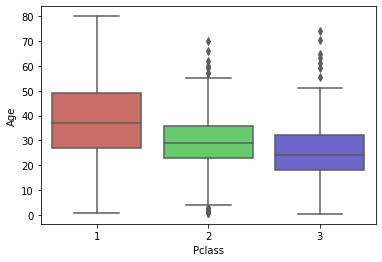

In [12]:
sb.boxplot(x='Pclass',y='Age',data=titanic_data,palette='hls')

In [13]:
def age_approx(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)

In [14]:
titanic_data.isnull().sum()

survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
titanic_data.dropna(inplace=True)

In [16]:
gender = pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [17]:
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [18]:
embark_location = pd.get_dummies(titanic_data['Embarked'], drop_first=True)

In [19]:
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
titanic_data.drop(['Sex', 'Embarked'],axis=1, inplace=True)

In [21]:
titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)

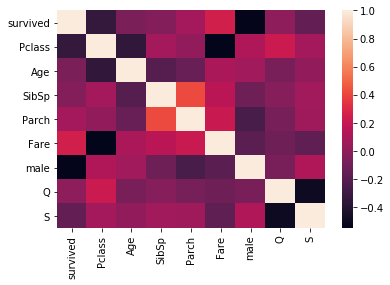

In [22]:
sb.heatmap(titanic_dmy.corr())

In [23]:
titanic_dmy.drop(['Fare','Pclass'], axis=1, inplace=True)

In [24]:
titanic_dmy.head()

,survived,Age,SibSp,Parch,male,Q,S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,0,1,0,1


In [25]:
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   male      889 non-null    uint8  
 5   Q         889 non-null    uint8  
 6   S         889 non-null    uint8  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 37.3 KB


In [28]:
X = titanic_dmy.iloc[:,1:7].values
y = titanic_dmy.iloc[:,0].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =.3, random_state=0)

In [30]:
Dectree = DecisionTreeClassifier()

In [31]:
Dectree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
y_pred = Dectree.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[132  25]
 [ 37  73]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       157
           1       0.74      0.66      0.70       110

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267

